<a href="https://colab.research.google.com/github/MarciaGodoy/UFRGS/blob/main/CNES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine** **Learning** **aplicado** **à** **saúde**

# Base de dados 2: CNES

O Cadastro Nacional de Estabelecimentos de Saúde (CNES) é o sistema de informação oficial de cadastramento de informações de todos os estabelecimentos de saúde no país, independentemente de sua natureza jurídica ou de integrarem o Sistema Único de Saúde (SUS). Trata-se do cadastro oficial do Ministério da Saúde (MS) no tocante à realidade da capacidade instalada e mão-de-obra assistencial de saúde no Brasil em estabelecimentos de saúde públicos ou privados, com convênio SUS ou não.
As informações do CNES serão adicionadas aos dados dos registros de nascidos vivos, possibilitando, por exemplo, verificar se o tamanho do estabelecimento de saúde afeta as taxas de partos cesáreos, dentre outros aspectos.



In [1]:
###Rotina em R
# usando pacote microdatasus (SALDANHA et al, 2019)

######################################################################################
##############################  INICIAL  #############################################
######################################################################################
# PACOTE UTILIZADO PARA DOWNLOAD E PRÉ-PROCESSAMENTO DE DADOS
# "Microdatasus: pacote para download e pré-processamento de microdados do Departamento de Informática do SUS (DATASUS)"
#cff-version: 1.2.0
#message: "If you use this software, please cite it as below."
#authors:
#- family-names: "Saldanha"
#  given-names: "Raphael de Freitas"
#  orcid: "http://orcid.org/0000-0003-0652-8466"
#- family-names: "Bastos"
#  given-names: "Ronaldo Rocha"
#  orcid: "http://orcid.org/0000-0001-9597-5967"
#- family-names: "Barcellos"
#  given-names: "Christovam"
#  orcid: "http://orcid.org/0000-0002-1161-2753"
#title: "Microdatasus: pacote para download e pré-processamento de microdados do Departamento de Informática do SUS (DATASUS)"
#version: 1.0.0
#doi: 10.1590/0102-311X00032419
#date-released: 2019-09-16
#url: "http://ref.scielo.org/dhcq3y"


## web scrapping
\def\caret{{^}}

Adicionando as bibliotecas necessárias

In [3]:
####################
##INSTALAR PACOTES
install.packages("read.dbc")
install.packages("devtools")
devtools::install_github("rfsaldanha/microdatasus")
install.packages("remotes")
#remotes::install_github("rfsaldanha/microdatasus") # apenas 1 vez na maquina


###################


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘roxygen2’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



bitops     (NA    -> 1.0-7   ) [CRAN]
cpp11      (0.4.2 -> 0.4.3   ) [CRAN]
tidyselect (1.1.2 -> 1.2.0   ) [CRAN]
tibble     (3.1.7 -> 3.1.8   ) [CRAN]
RCurl      (NA    -> 1.98-1.9) [CRAN]


Installing 5 packages: bitops, cpp11, tidyselect, tibble, RCurl

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpqFHJGE/remotes3720284f55/rfsaldanha-microdatasus-959bdf1/DESCRIPTION’ ... OK
* preparing ‘microdatasus’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘microdatasus_2.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages(c("dplyr", "stringr", "rio", "read.dbc", "readxl", "writexl"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘openxlsx’




In [7]:
install.packages(c("tydiverse", "tidyr", "dplyr", "lubridate"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tydiverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [8]:
install.packages(c("gtsummary", "gt", "gmodels", "ggplot2", "devtools"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘labelled’, ‘gtools’, ‘ragg’, ‘broom.helpers’, ‘gdata’, ‘pkgdown’


Warning message in install.packages(c("gtsummary", "gt", "gmodels", "ggplot2", "devtools")):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("gtsummary", "gt", "gmodels", "ggplot2", "devtools")):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages(c("gtsummary", "gt", "gmodels", "ggplot2", "devtools")):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages(c("gtsummary", "gt", "gmodels", "ggplot2", "devtools")):
“installation of package ‘devtools’ had non-zero exit status”


In [9]:
install.packages(c("data.table", "caret", "xgboost", "glmnet", "rpart", "Matrix", "quantmod"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘shape’, ‘RcppEigen’, ‘xts’, ‘zoo’, ‘TTR’




In [10]:
install.packages(c("lattice", "fastDummies", "stargazer", "skimr", "magrittr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages(c("zoo", "pacman", "sandwich", "recipes", "msm", "plm"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘mvtnorm’, ‘expm’, ‘bdsmatrix’, ‘collapse’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’




In [12]:
# carregando os pacotes 
library(rio) # importar base de dados de diferentes extensoes
library(read.dbc)#ler arquivos sus
library(readxl)#ler excel
library(writexl)#salvar excel
library(tidyr) # comando replace_na
library(dplyr) # manipular base de dados usando %>%
library(lubridate) # trabalhar com data
library(gtsummary) # tabelas
library(gt) # nota de rodapé na tabela
library(gmodels)#tabelas
library(ggplot2) # graficos
library(devtools)
library(tidyverse)
library(data.table)
library(caret)#KNN , CLASSIFICAÇÃO
library(xgboost) #classificacao
library(glmnet)
library(rpart)
library(Matrix)
library(quantmod)
library(lattice)
library(microdatasus) #pacote de extracao de dados do datasus
library(fastDummies) 
library(stargazer)
library(skimr)#faz resumo das variaveis
library(stringr)
library(magrittr)
library(stringr) #para trabalhar com caracteres , extracao 
library(zoo)
if (!require("pacman")) install.packages("pacman")
pacman::p_load(recipes) 
library(recipes)
library(stringr)#variaveis com texto
require(sandwich)
require(msm)
library(plm)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: usethis

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks 

In [5]:
remotes::install_github("higgi13425/medicaldata")

* checking for file ‘/tmp/RtmpqFHJGE/remotes375aeca3d9/higgi13425-medicaldata-7b0c9e1/DESCRIPTION’ ... OK
* preparing ‘medicaldata’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘medicaldata_0.2.0.9001.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
#################
##  IMPORTANDO BASE DE DADOS -webscrapping
#################
#demorado porque há uma
cad_saude <- fetch_datasus(year_start = 2018, month_start=1, year_end = 2020, month_end=12, uf = "RS", information_system = "CNES-ST")
skim(cad_saude)
cad_saude <- cad_saude %>% filter( CODUFMUN == "431490" & QTLEITP1 >= "1" ) %>% 
  select("CNES", "VINC_SUS", "TPGESTAO", "QTLEITP1", "QTLEITP2", "CODUFMUN", "DT_ATUAL", "COMPETEN")

cad_saude <- process_cnes(cad_saude, information_system = "CNES-ST", nomes= TRUE, municipality_data = TRUE)



Your local Internet connection seems to be ok.

DataSUS FTP server seems to be up. Starting download...



── Data Summary ────────────────────────
                           Values   
Name                       cad_saude
Number of rows             951437   
Number of columns          208      
_______________________             
Column type frequency:              
  factor                   153      
  numeric                  55       
________________________            
Group variables            None     

── Variable type: factor ───────────────────────────────────────────────────────
    skim_variable n_missing complete_rate ordered n_unique
  1 CNES                  0       1       FALSE      30307
  2 CODUFMUN              0       1       FALSE        497
  3 COD_CEP               0       1       FALSE       4559
  4 CPF_CNPJ              0       1       FALSE      24672
  5 PF_PJ                 0       1       FALSE          2
  6 NIV_DEP               0       1       FALSE          2
  7 CNPJ_MAN              0       1       FALSE        544
  8 COD_IR           951437       0

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [14]:
table(cad_saude$COMPETEN)#tabela de numero de observacoes





201801 201802 201803 201804 201805 201806 201807 201808 201809 201810 201811 
    22     22     22     22     22     22     23     23     23     23     24 
201812 201901 201902 201903 201904 201905 201906 201907 201908 201909 201910 
    24     24     24     24     24     24     24     24     24     24     24 
201911 201912 202001 202002 202003 202004 202005 202006 202007 202008 202009 
    24     24     24     24     24     24     24     24     24     24     24 
202010 202011 202012 
    24     24     24 

Preparando para o merge - data

In [15]:
#####obter ano e mes - note que o formato original não era adequado para uso de yearmon, strptime e year(lubridate)
################

cad_saude$COMPETEN <- as.character(cad_saude$COMPETEN)
#####obter ano e mes - note que o formato original não era adequado para uso de yearmon, strptime e year(lubridate)
cad_saude$ano <- str_sub(cad_saude$COMPETEN, 0, 4)
cad_saude$mes <- str_sub(cad_saude$COMPETEN, -2)
cad_saude$mes.nasc <- cad_saude$mes
cad_saude$Ano.nasc <- cad_saude$ano
cad_saude$Ano.nasc <- as.factor(cad_saude$Ano.nasc)
cad_saude$mes.nasc <- as.factor(cad_saude$mes.nasc)
###gerando artificialmente uma data 
cad_saude$dia = "31"

#cad_saude %>%
cad_saude$datacompleta <-  paste(cad_saude$dia, cad_saude$mes, cad_saude$ano, sep = '-')
cad_saude <- cad_saude%>%
  mutate(datacompleta = as.Date(datacompleta))
class(cad_saude$datacompleta)


[1] "Date"

In [16]:
cad_saude$CODESTAB <- cad_saude$CNES_integer
cad_saude <- cad_saude%>%
  mutate(CODESTAB = as.factor(CODESTAB))


In [17]:
####salvando bd2
save(cad_saude, file = "cadastro saude Porto Alegre.RData") #salvando em formato R
write.table(cad_saude, file = "cadastro saude Porto Alegre.csv", sep =",", na="", quote= TRUE, row.names = FALSE) #salvando em formato csv
#############################


####################################################################################################
#### BANCO DE DADOS 2: CADASTRO DE ESTABELECIMENTOS DE SAUDE


This syntax fits a linear model, using the `lm()` function, in order to predict `wage` using a fourth-degree polynomial in `age`: `poly(age, 4)`. The `poly()` command allows us to avoid having to write out a long formula with powers of `age`. The function returns a matrix whose columns are a basis of *orthogonal polynomials* , which essentially means that each column is a linear combination of the variables `age`, `age^2`,  `age^3` and `age^4`.

However, we can also use `poly()` to obtain `age`, `age^2`,  `age^3` and `age^4` directly, if we prefer. We can do this by using the `raw = TRUE` argument to the `poly()` function.
Later we   see that this does not affect the model in a meaningful way---though the choice of basis clearly affects the coefficient estimates, it does not affect the fitted values obtained.

In [ ]:
fit2 <- lm(wage ~ poly(age, 4, raw = T), data = Wage)
coef(summary(fit2))
#veja o comando raw

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


There are several other equivalent ways of fitting this model, which showcase the flexibility of the formula language in `R`. For example

In [ ]:
fit2a <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4),
    data = Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

This simply creates the polynomial basis functions on the fly, taking care to protect terms like `age^2` via the  function `I()` (the `^` symbol has a special meaning in formulas).

In [ ]:
fit2b <- lm(wage ~ cbind(age, age^2, age^3, age^4),
    data = Wage)
    #cbind divide a amostra
  

This does the same more compactly, using the `cbind()` function for building a matrix from a collection of vectors; any function call such as `cbind()` inside a formula also serves as a wrapper.

We now create a grid of values for `age` at which we want predictions, and then call the generic `predict()` function, specifying that we want standard errors as well.

In [ ]:
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid),
    se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit,
    preds$fit - 2 * preds$se.fit)

Finally, we plot the data and add the fit from the degree-4 polynomial.

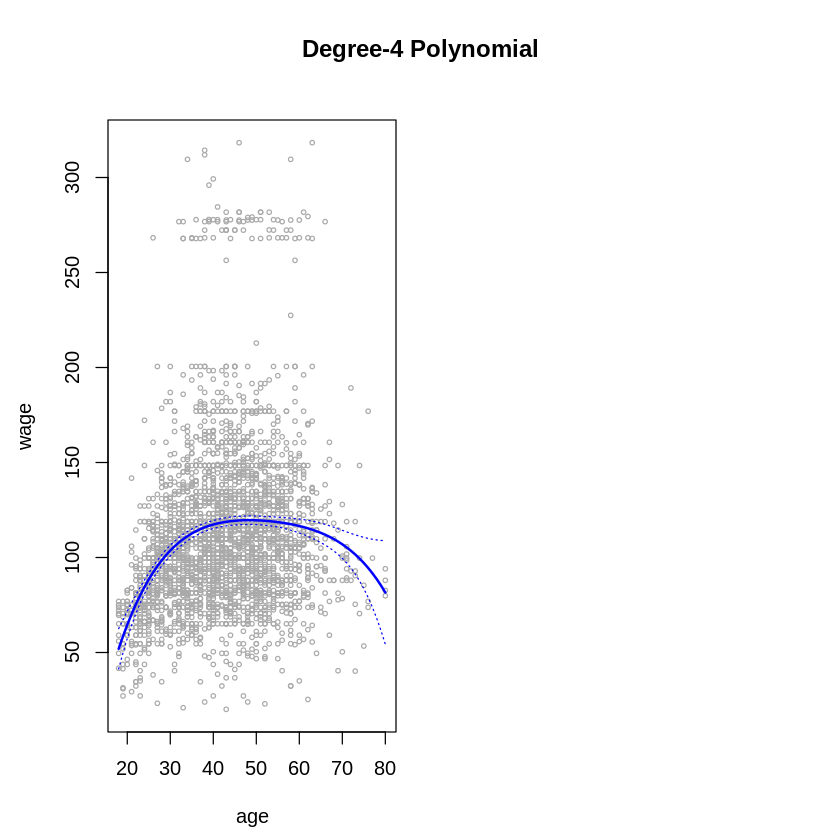

In [ ]:
par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1),
    oma = c(0, 0, 4, 0))
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Degree-4 Polynomial", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

Here the `mar` and `oma` arguments to `par()` allow us to control the margins of the plot, and the `title()` function creates a figure title that spans both subplots.

We mentioned earlier that whether or not an orthogonal set of basis functions is produced in the `poly()` function will not affect the model obtained in a meaningful way. What do we mean by this? The fitted values obtained in either case are
identical:

In [ ]:
preds2 <- predict(fit2, newdata = list(age = age.grid),
    se = TRUE)
max(abs(preds$fit - preds2$fit))

[1] 1.641354e-12

In performing a polynomial regression we must decide on the degree of
the polynomial to use. One way to do this is by using hypothesis
tests. We now fit models ranging from linear to a degree-5 polynomial
and seek to determine the simplest model which is sufficient to
explain the relationship 
between `wage` and `age`. We use the
`anova()` function, which performs an \define{analysis of
  variance} (ANOVA, using an F-test) in order to test the null
hypothesis that a model $\mathcal{M}_1$ is sufficient to explain the
data against the alternative hypothesis that a more complex model
$\mathcal{M}_2$ is required. In order to use the `anova()`
function, $\mathcal{M}_1$ and $\mathcal{M}_2$ must be *nested*
models: the predictors in $\mathcal{M}_1$ must be a subset of the
predictors in $\mathcal{M}_2$. In this case, we fit five different
models and sequentially compare the simpler model to the more complex
model.

In [ ]:
fit.1 <- lm(wage ~ age, data = Wage)
fit.2 <- lm(wage ~ poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ poly(age, 3), data = Wage)
fit.4 <- lm(wage ~ poly(age, 4), data = Wage)
fit.5 <- lm(wage ~ poly(age, 5), data = Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786.010,143.5931074,2.367734e-32
3,2996,4777674,1,15755.694,9.8887559,1.679213e-03
4,2995,4771604,1,6070.152,3.8098134,5.104623e-02
5,2994,4770322,1,1282.563,0.8049758,3.696820e-01


The p-value comparing the linear `Model 1` to the quadratic
`Model 2` is essentially zero ($<$$10^{-15}$), indicating that a linear
fit is not sufficient. Similarly the p-value comparing the quadratic
 `Model 2` to the cubic `Model 3` is very low ($0.0017$), so
the quadratic fit is also insufficient. The p-value comparing the
cubic and degree-4 polynomials, `Model 3` and `Model 4`, is approximately $5\,\%$
while the degree-5 polynomial `Model 5` seems unnecessary because its
p-value is $0.37$. Hence, either a cubic or a quartic
polynomial appear to provide a reasonable fit to the data, but lower-
or higher-order models are not justified.

In this case, instead of using the `anova()` function, we could have obtained these p-values more succinctly by exploiting the fact that `poly()` creates orthogonal polynomials.

In [ ]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Notice that the p-values are the same, and in fact the square of the  $t$-statistics are equal to the F-statistics from the `anova()` function; for example:

In [ ]:
(-11.983)^2

[1] 143.5923

However, the ANOVA method works whether or not we used orthogonal polynomials; it also works when we have other terms in the model as well. For example, we can use `anova()` to compare these three models:

In [ ]:
fit.1 <- lm(wage ~ education + age, data = Wage)
fit.2 <- lm(wage ~ education + poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ education + poly(age, 3), data = Wage)
anova(fit.1, fit.2, fit.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2994,3867992,NA,NA,NA,NA
2,2993,3725395,1,142597.10,114.696898,2.728971e-26
3,2992,3719809,1,5586.66,4.493588,3.410431e-02


As an alternative to using hypothesis tests and ANOVA, we could choose the polynomial degree using  cross-validation, as discussed in Chapter 5.

Next we consider the task of predicting whether an individual earns more than $$250{,}000$ per year. We proceed much as before, except that first we create the appropriate response vector, and then apply the `glm()` function using `family = "binomial"` in order to fit a polynomial logistic regression model.

In [ ]:
fit <- glm(I(wage > 250) ~ poly(age, 4), data = Wage,
    family = binomial)

Note that we again use the wrapper `I()` to create this binary response variable on the fly. The expression `wage > 250` evaluates to a logical variable containing `TRUE`s and `FALSE`s, which `glm()` coerces to binary by setting the `TRUE`s to 1 and the `FALSE`s to 0.

Once again, we make predictions using the `predict()` function.

In [ ]:
preds <- predict(fit, newdata = list(age = age.grid), se = T)

However, calculating the confidence intervals is slightly more involved than in the linear regression case.
The default prediction type for a `glm()` model
is `type = "link"`, which is what we use here.  This means we get
predictions for the *logit* , or log-odds: that is, we have fit a model of the form
\[
\log\left(\frac{\Pr(Y=1|X)}{1-\Pr(Y=1|X)}\right)=X\beta,
\]
 and the predictions given are of the form $X\hat\beta$.  The  standard errors given are also for $X \hat\beta$. In order to obtain confidence intervals for $\Pr(Y=1|X)$, we use the transformation
\[
\Pr(Y=1|X)=\frac{\exp(X\beta)}{1+\exp(X\beta)}.
\]

In [ ]:
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit,
    preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))

Note that we could have directly computed the probabilities by selecting the `type = "response"` option in the `predict()` function.

In [ ]:
preds <- predict(fit, newdata = list(age = age.grid),
    type = "response", se = T)

However, the corresponding confidence intervals would not have been sensible because we would end up with negative probabilities!

Finally, the right-hand plot from Figure 7.1 was made as follows:

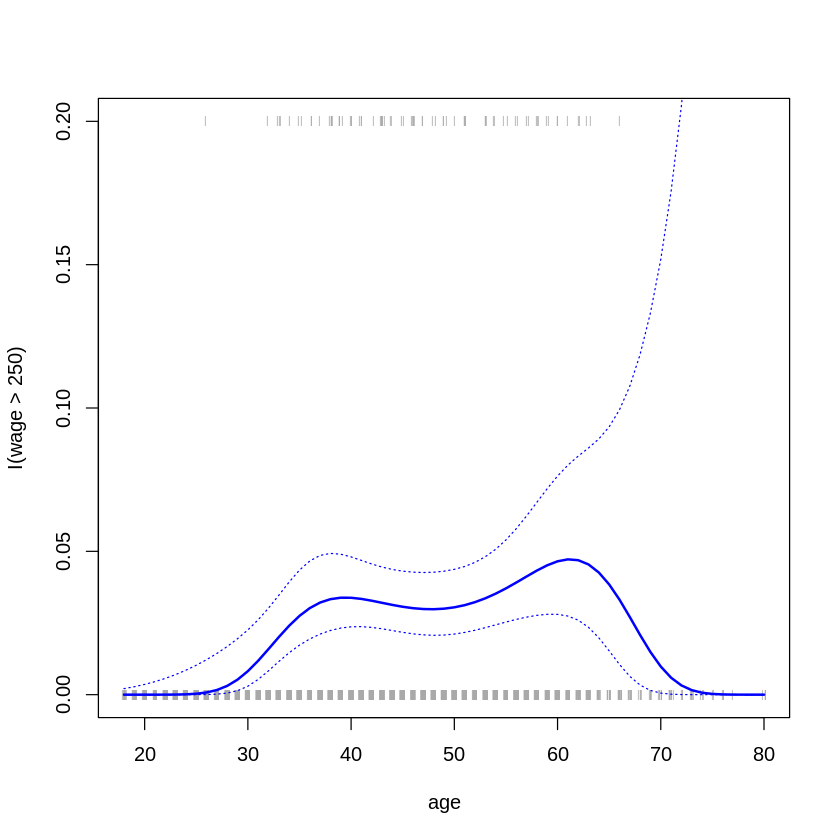

In [ ]:
plot(age, I(wage > 250), xlim = agelims, type = "n",
    ylim = c(0, .2))
points(jitter(age), I((wage > 250) / 5), cex = .5, pch = "|", col = "darkgrey")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

We have drawn  the `age` values corresponding to the observations with `wage` values above $250$ as gray marks on the top of the plot, and those with `wage` values below $250$ are shown as gray marks on the bottom of the plot. We used
the `jitter()` function to jitter the `age` values a bit so that observations with the same `age` value do not cover each other up. This is often called a .

In order to fit a step function, as discussed in Section 7.2, we use the `cut()` function.

In [ ]:
table(cut(age, 4))
fit <- lm(wage ~ cut(age, 4), data = Wage)
coef(summary(fit))
#step function 
#na faixa etaria 64 - 80 idade não explica salario ...estatisticamente não significativa



(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


Here `cut()` automatically picked the cutpoints at $33.5$, $49$, and $64.5$~years of age. We could also have specified our own cutpoints directly using the `breaks` option.
The function `cut()` returns an ordered categorical variable ; the `lm()` function then creates a set of dummy variables for use in the regression. The `age < 33.5` category is left out, so the intercept coefficient of $$94{,}160$ can be interpreted as the average salary for those under $33.5$~years of age, and the other coefficients can be interpreted as the average additional salary for those in the other age groups.
We can produce predictions and plots just as we did in the case of the polynomial fit.


In order to fit regression splines in `R`, we use the `splines` library.
In Section 7.4, we saw that regression
splines can be fit by constructing an appropriate matrix of basis functions.
The
 `bs()` function generates the entire matrix of basis functions for splines with the specified set of knots. By default, cubic splines are produced.
Fitting `wage` to `age` using a regression spline is simple:

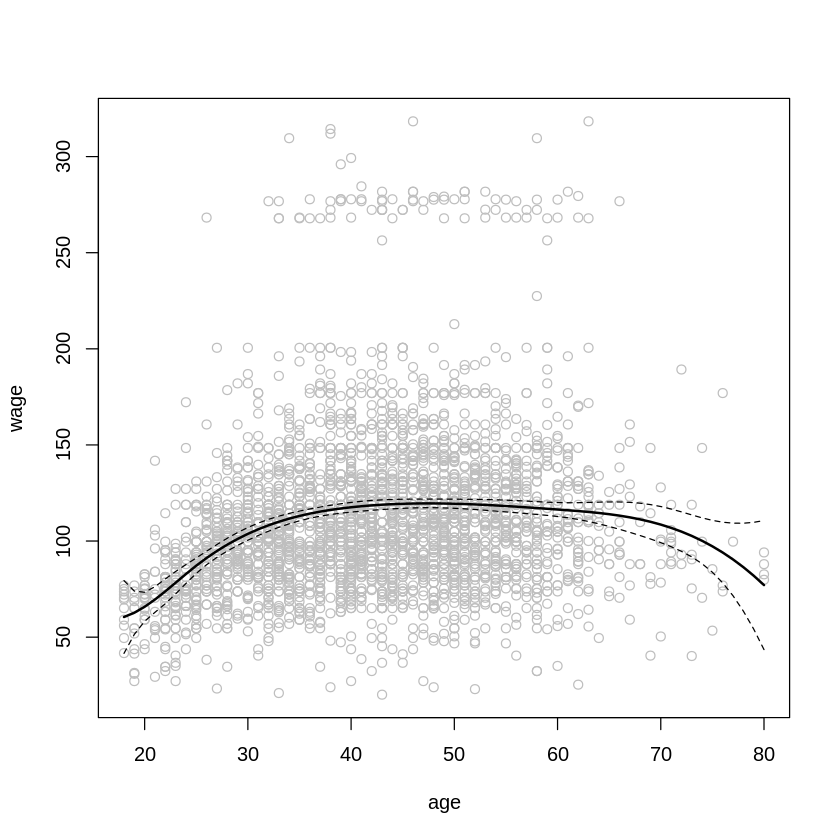

In [ ]:
library(splines)
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
pred <- predict(fit, newdata = list(age = age.grid), se = T)
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2 * pred$se, lty = "dashed")

Here we have prespecified knots at ages $25$, $40$, and $60$. This produces a spline with six basis functions. (Recall that a cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an intercept, plus six basis functions.) We could also use the `df` option to produce a spline with knots at uniform quantiles
of the data.

In [ ]:
dim(bs(age, knots = c(25, 40, 60)))
dim(bs(age, df = 6))
attr(bs(age, df = 6), "knots")
#df niveis de flexibilidade - df graus de liberdade

[1] 3000    6

[1] 3000    6

25%   50%   75% 
33.75 42.00 51.00

In this case `R` chooses knots at ages $33.8, 42.0$, and $51.0$, which correspond to the 25th, 50th, and 75th percentiles of `age`. The function `bs()` also has a `degree` argument, so we can fit splines of any degree, rather than the default degree of 3 (which yields a cubic spline).  

In order to instead fit a natural spline, we use the `ns()` function. 
Here we fit a natural spline with four degrees of freedom.

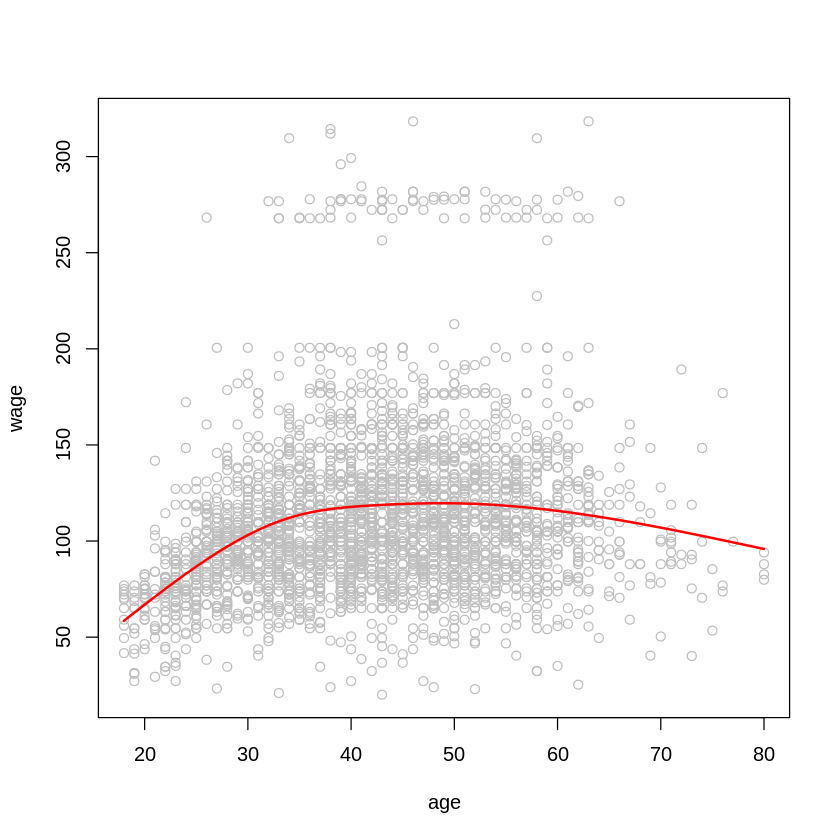

In [ ]:
fit2 <- lm(wage ~ ns(age, df = 4), data = Wage)
pred2 <- predict(fit2, newdata = list(age = age.grid),
     se = T)
plot(age, wage, col = "gray")
lines(age.grid, pred2$fit, col = "red", lwd = 2)
# as faixas etárias são mais amplas, suavizando a distribuição

As with the `bs()` function, we could instead specify the knots directly using the `knots` option.

  In order to fit a smoothing spline, we use
the `smooth.spline()` function.
Figure 7.8  was produced with the following
code:

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”


[1] 6.794596

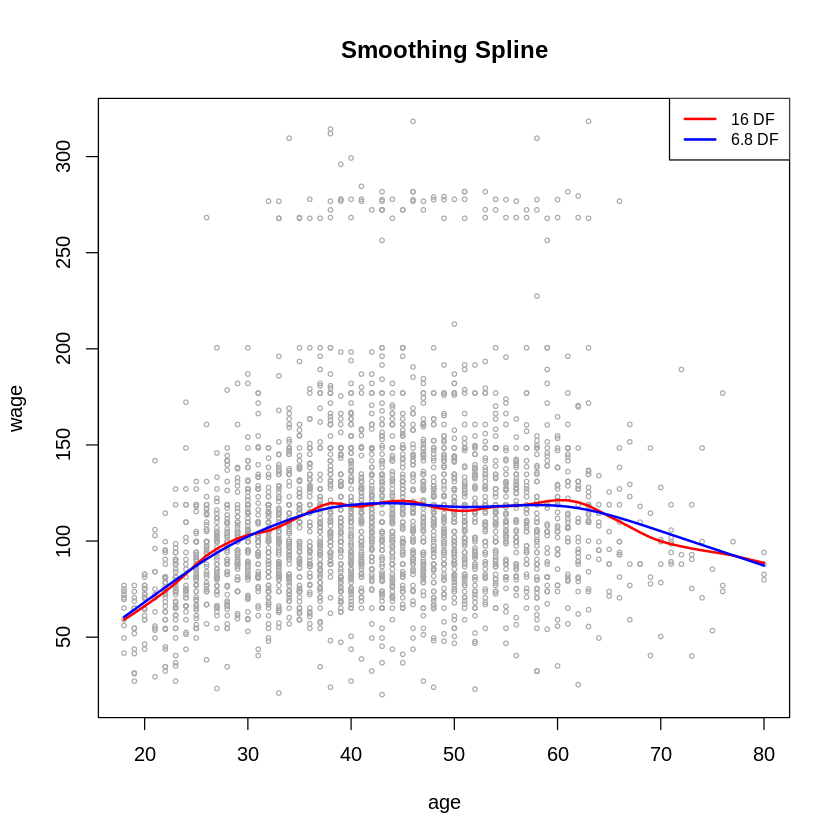

In [ ]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Smoothing Spline")
fit <- smooth.spline(age, wage, df = 16)
fit2 <- smooth.spline(age, wage, cv = TRUE)
fit2$df
lines(fit, col = "red", lwd = 2)
lines(fit2, col = "blue", lwd = 2)
legend("topright", legend = c("16 DF", "6.8 DF"),
    col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)
    #aumentou o df, suavizando a distribuição df=6 => df.16 ...entretanto, pode causar overfitting - tomar decisao baseada no banco de teste

Notice that in the first call to `smooth.spline()`, we specified `df = 16`. The function then  determines which value of $\lambda$  leads to $16$ degrees of freedom.
 In the second call to `smooth.spline()`, we select the smoothness level by cross-validation;
 this results in a value of $\lambda$ that yields 6.8 degrees of freedom.

In order to perform local regression, we use the `loess()` function. 

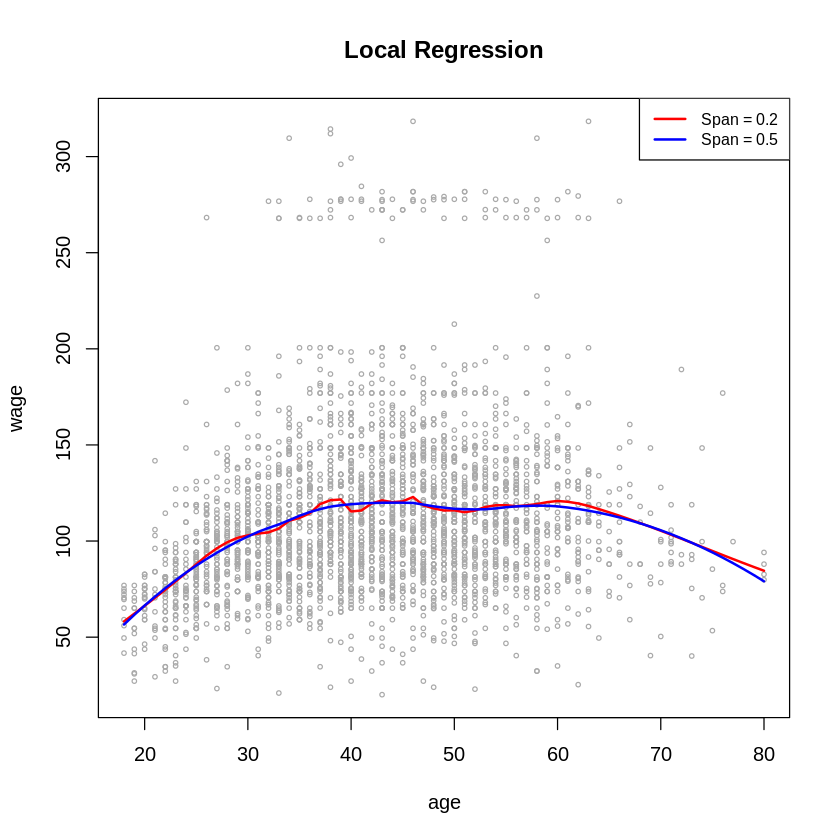

In [ ]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Local Regression")
fit <- loess(wage ~ age, span = .2, data = Wage)
fit2 <- loess(wage ~ age, span = .5, data = Wage)
lines(age.grid, predict(fit, data.frame(age = age.grid)),
    col = "red", lwd = 2)
lines(age.grid, predict(fit2, data.frame(age = age.grid)),
    col = "blue", lwd = 2)
legend("topright", legend = c("Span = 0.2", "Span = 0.5"),
    col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)

Here we have performed local linear regression using spans of $0.2$ and $0.5$: that is, each neighborhood consists of 20\,\% or 50\,\% of the observations. The larger the span, the smoother the fit.
The `locfit` library can also be used for fitting local regression models in `R`.

## GAMs

We now fit a GAM to predict `wage` using natural spline functions of `lyear` and `age`,  treating `education` as a qualitative predictor, as in (7.16). Since this is just a big linear regression model using an appropriate choice of basis functions, we can simply do this using the `lm()` function.

In [ ]:
gam1 <- lm(wage ~ ns(year, 4) + ns(age, 5) + education,
    data = Wage)

We now fit the model (7.16) using smoothing splines rather than natural splines.  In order to fit more general sorts of GAMs, using smoothing splines or other components that cannot be expressed in terms of basis functions and then fit using least squares regression, we will need to use the `gam` library in `R`.

The `s()` function, which is part of the `gam` library, is used to indicate that we would like to use a smoothing spline. We specify that the function of `lyear` should have $4$ degrees of freedom, and that the function of `age` will have $5$ degrees of freedom. Since `education` is qualitative, we leave it as is, and it is converted into four dummy variables. We use the `gam()` function in order to fit a GAM using these components.
 All of the terms in (7.16) are fit simultaneously, taking each other into account to explain the response.

In [ ]:
install.packages("gam")
library(gam)
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education,
    data = Wage)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In order to produce  Figure 7.12, we simply call the `plot()` function:

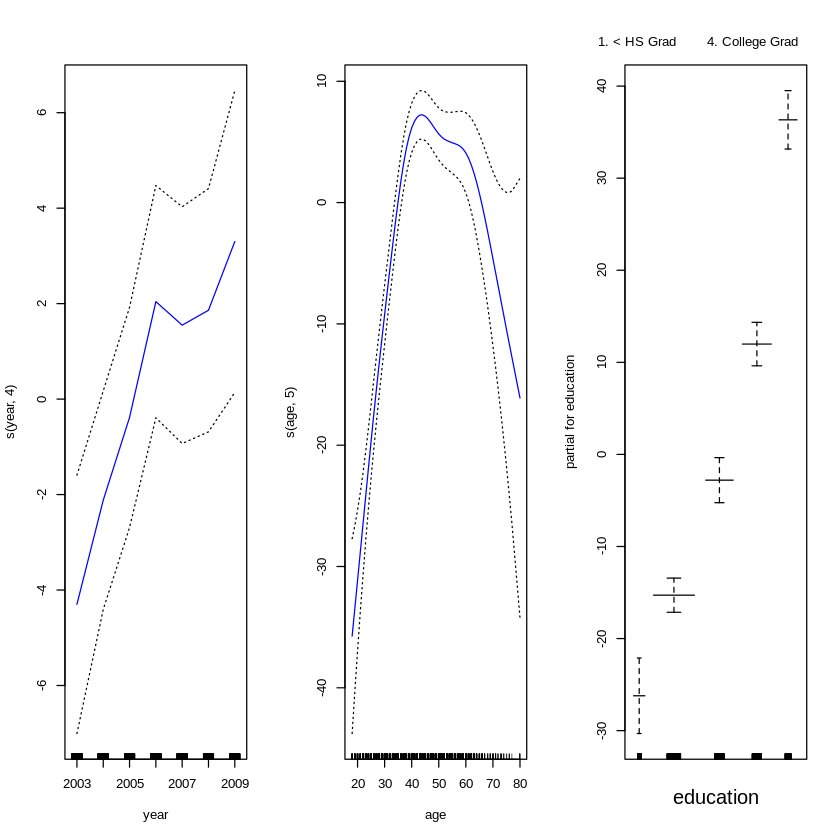

In [ ]:
par(mfrow = c(1, 3))
plot(gam.m3, se = TRUE, col = "blue")

The generic `plot()` function recognizes that `gam.m3` is an
object of class `Gam`, and invokes the appropriate
`plot.Gam()` method.  Conveniently, even though
  `gam1` is not of class `Gam` but rather of class `lm`, we can {\em
  still} use `plot.Gam()` on it.  Figure 7.11 was produced using the following expression:

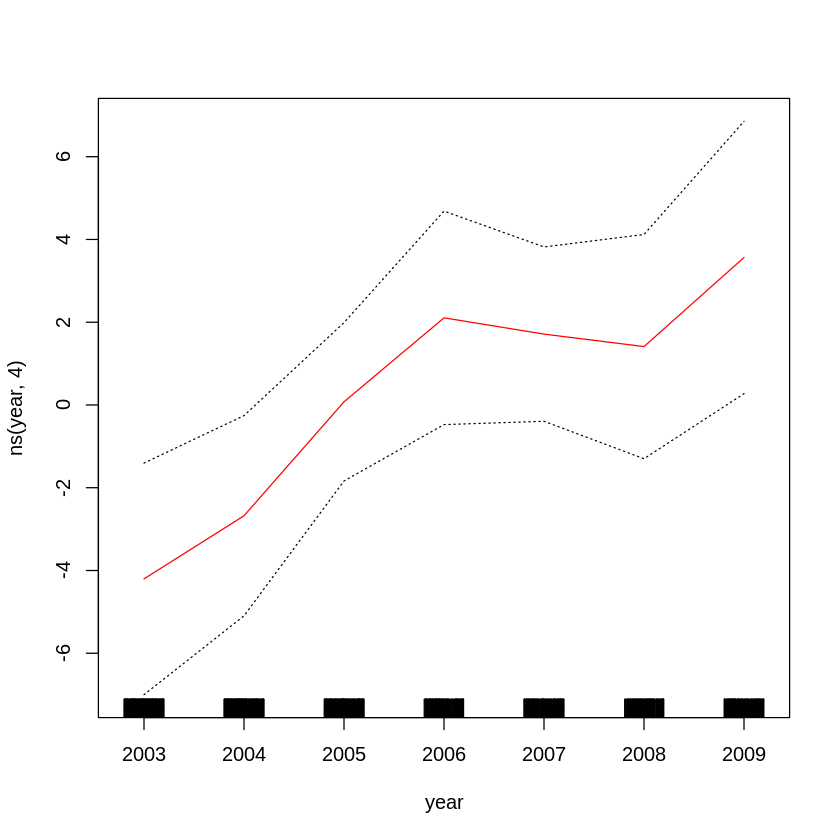

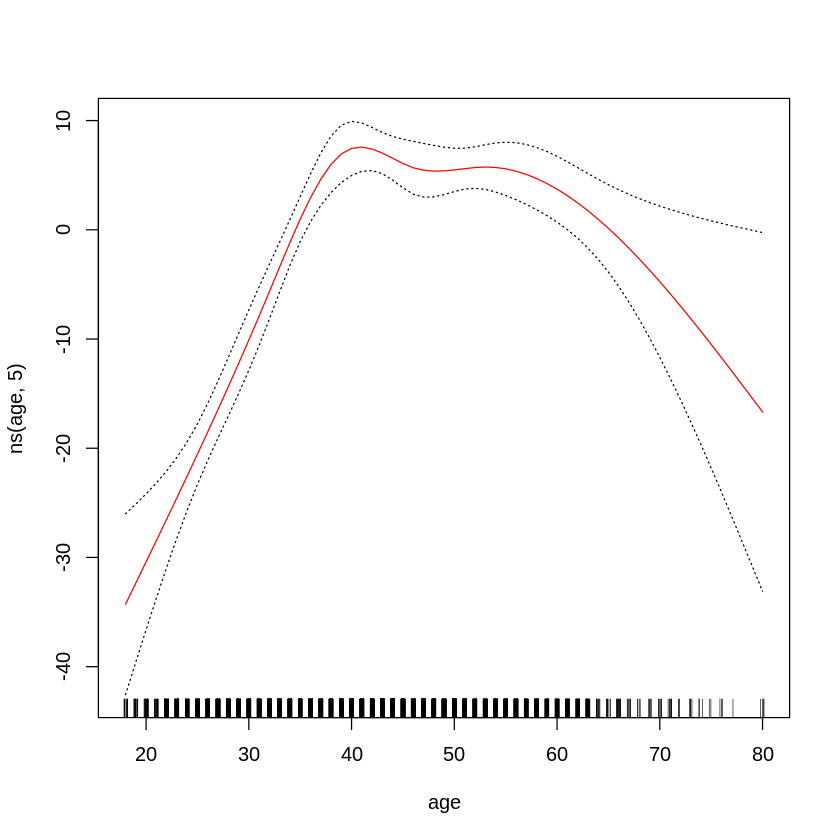

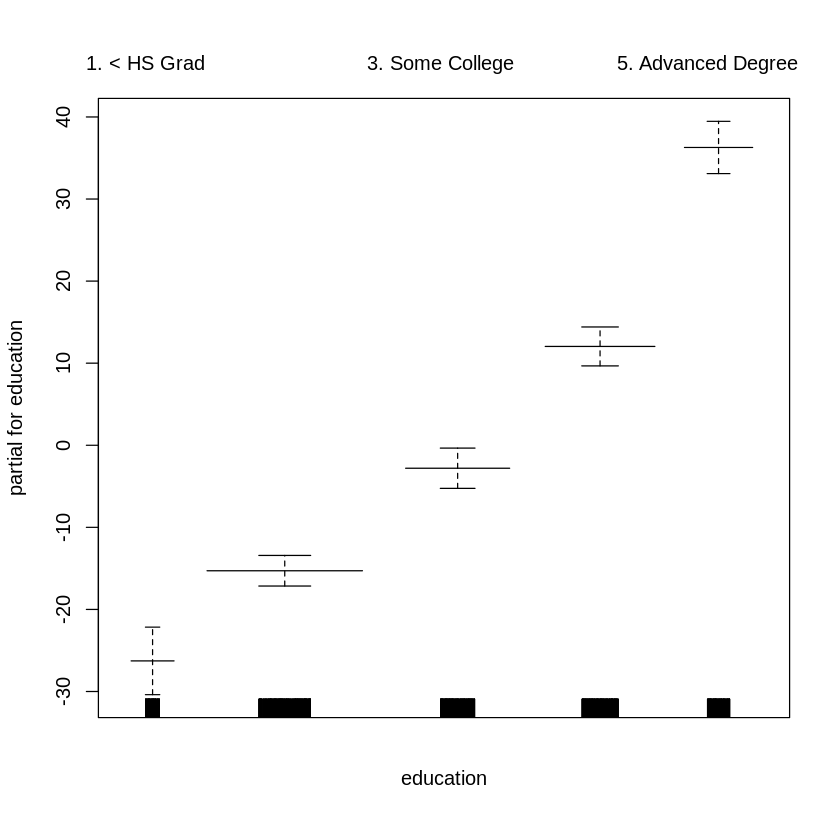

In [ ]:
plot.Gam(gam1, se = TRUE, col = "red")

Notice here we had to use `plot.Gam()` rather than the *generic* `plot()` function.

In these plots, the function of `lyear` looks rather linear. We can perform a series of ANOVA tests in order to determine which of these three models is best:  a GAM that excludes `lyear` ($\mathcal{M}_1$),  a GAM that uses a linear function of `lyear` ($\mathcal{M}_2$), or  a GAM that uses a spline function
of `lyear` ($\mathcal{M}_3$).

In [ ]:
gam.m1 <- gam(wage ~ s(age, 5) + education, data = Wage)
gam.m2 <- gam(wage ~ year + s(age, 5) + education,
    data = Wage)
anova(gam.m1, gam.m2, gam.m3, test = "F")
#modelo 2 é o melhor

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2990,3711731,NA,NA,NA,NA
2,2989,3693842,1.000000,17889.243,14.477130,0.0001447167
3,2986,3689770,2.999989,4071.134,1.098212,0.3485661430


We find that there is compelling evidence that a GAM with a linear function of `lyear` is better than a GAM that does not include `lyear` at all \hbox{(p-value\,=\,0.00014).} However, there is no evidence that a non-linear function of `lyear` is needed (p-value\,=\,0.349).
In other words, based on the results of this ANOVA, $\mathcal{M}_2$ is preferred.

The `summary()` function produces a summary of the gam fit.

In [ ]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
--

The ``Anova for Parametric Effects" p-values clearly demonstrate that `year`, `age`, and `education` are all highly statistically significant, even when only assuming a linear relationship. Alternatively, the ``Anova for Nonparametric Effects" p-values for `year` and `age` correspond to a null hypothesis of a linear relationship versus the alternative of a non-linear relationship. The large p-value for `year` reinforces our conclusion from the ANOVA test that a linear function is adequate for this term. However, there is very clear evidence that a non-linear term is required for `age`.

We can make predictions
using the `predict()` method for the class `Gam`.
 Here we make predictions on the training set.

In [ ]:
preds <- predict(gam.m2, newdata = Wage)

We can also use local regression fits as building blocks in a GAM, using the `lo()` function.

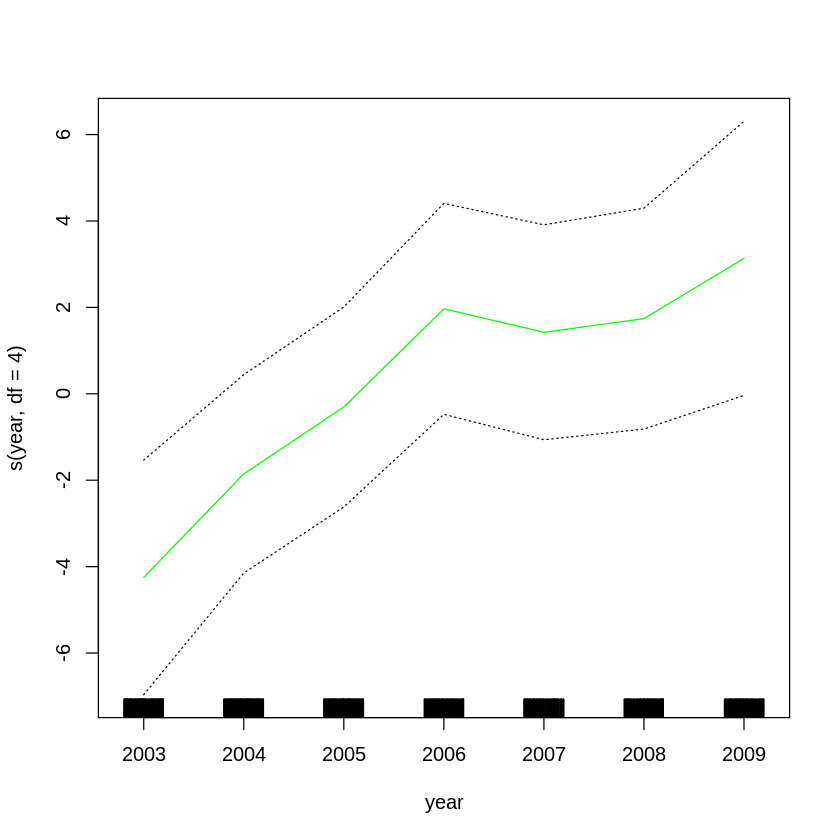

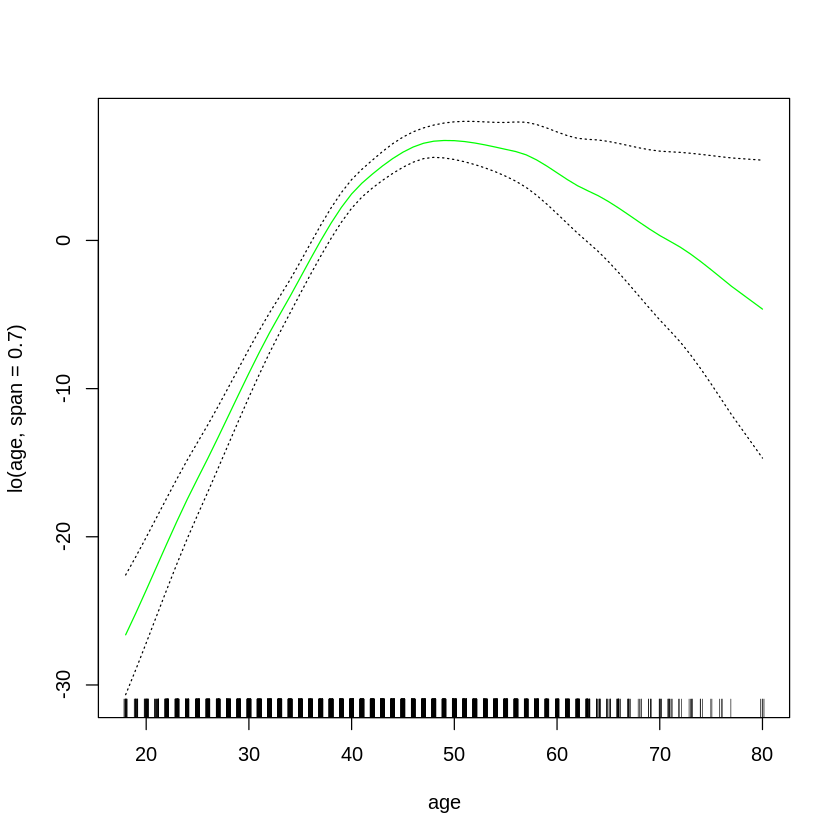

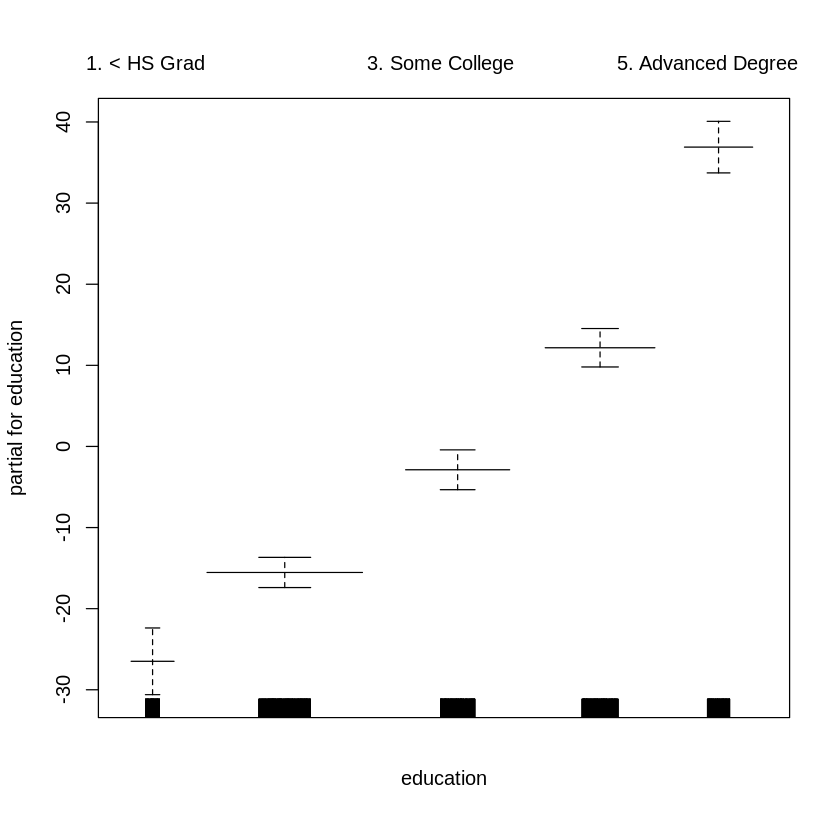

In [ ]:
gam.lo <- gam(
    wage ~ s(year, df = 4) + lo(age, span = 0.7) + education,
    data = Wage
  )
plot.Gam(gam.lo, se = TRUE, col = "green")

Here we have used local regression for the `age` term, with a span of
$0.7$.
We can also use the `lo()` function to create interactions before calling the `gam()` function. For example,

In [ ]:
gam.lo.i <- gam(wage ~ lo(year, age, span = 0.5) + education,
    data = Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”


fits a two-term model, in which the first term is an interaction between `lyear` and `age`, fit by a local regression surface. We can plot the resulting two-dimensional surface if we first install the `akima` package.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



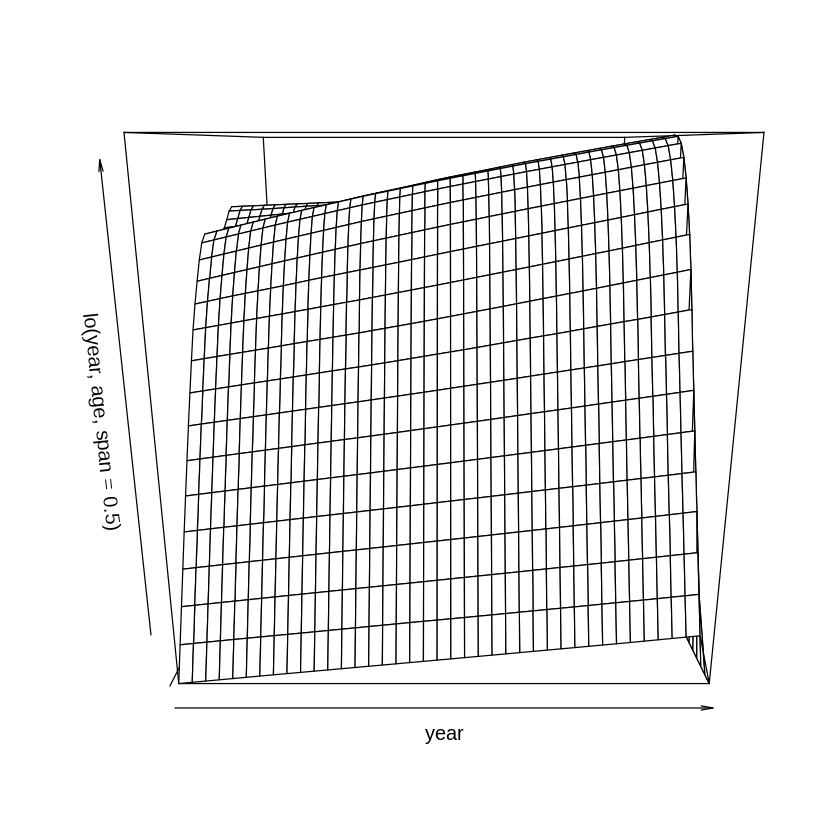

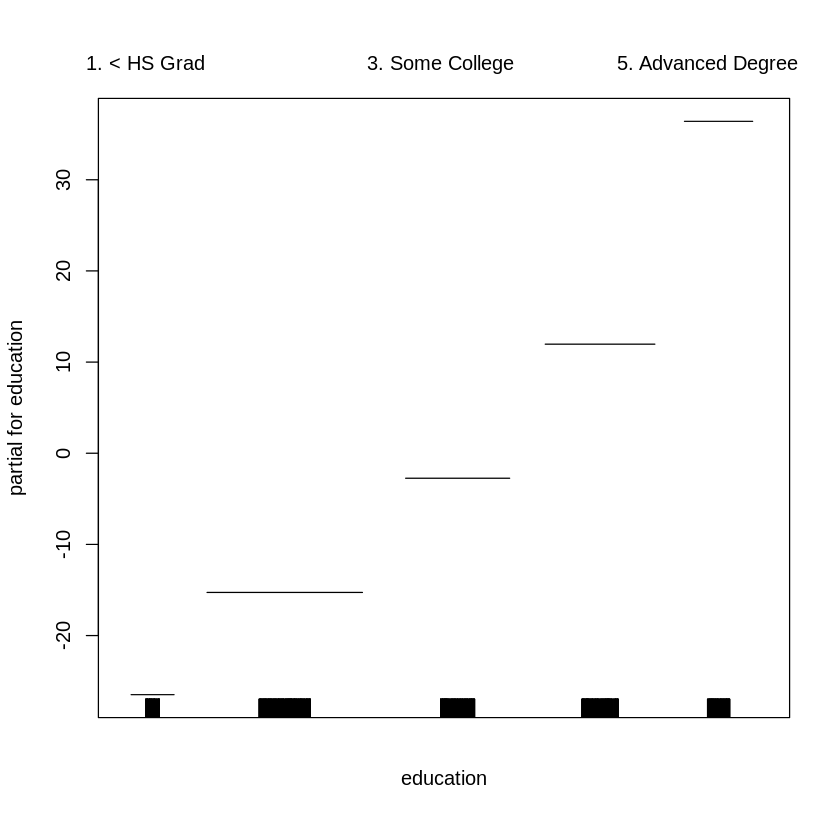

In [ ]:
install.packages("akima")n#faz graficos em 3 d
install.packages("interp")
library(akima)
library(interp)
plot(gam.lo.i)

In order to fit a logistic regression GAM, we once again use the `I()` function in constructing the binary response variable, and set `family=binomial`.

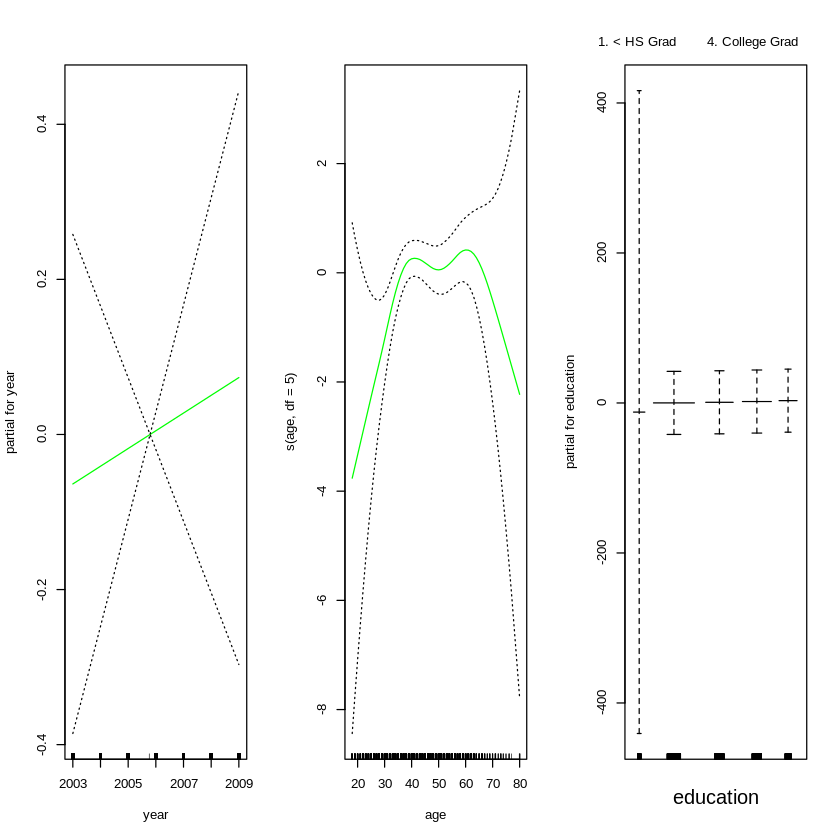

In [ ]:
gam.lr <- gam(
    I(wage > 250) ~ year + s(age, df = 5) + education,
    family = binomial, data = Wage
  )
par(mfrow = c(1, 3))
plot(gam.lr, se = T, col = "green")

It is easy to see that there are no high earners in the `< HS` category:

In [ ]:
table(education, I(wage > 250))
#probabilidade de ter salario acima de 250 dolares. 

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

Hence, we fit a logistic regression GAM using all but this category. This provides more sensible results.

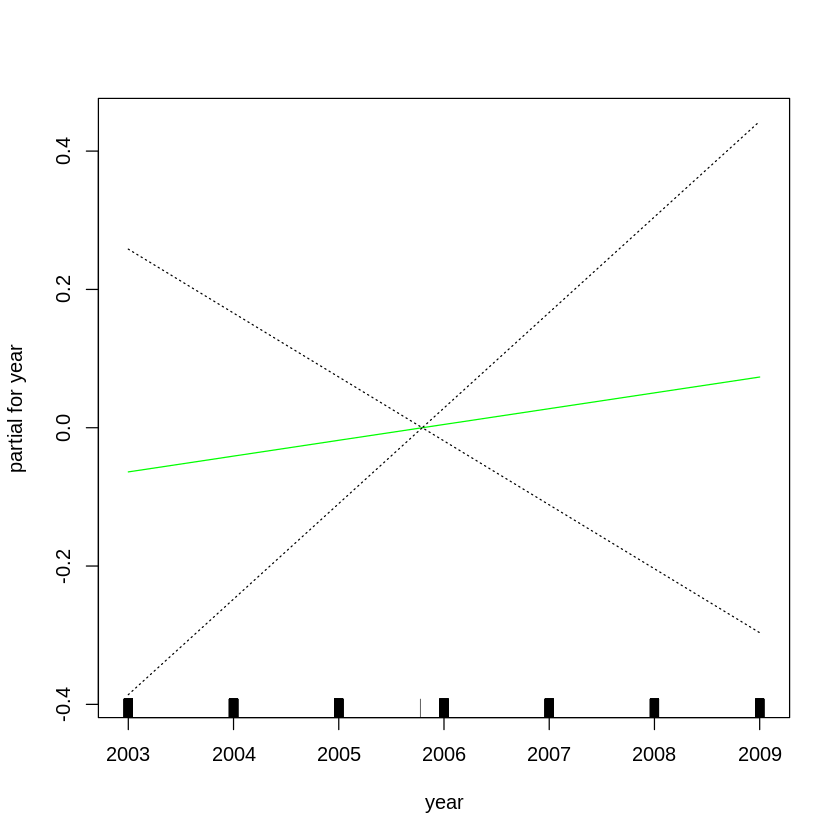

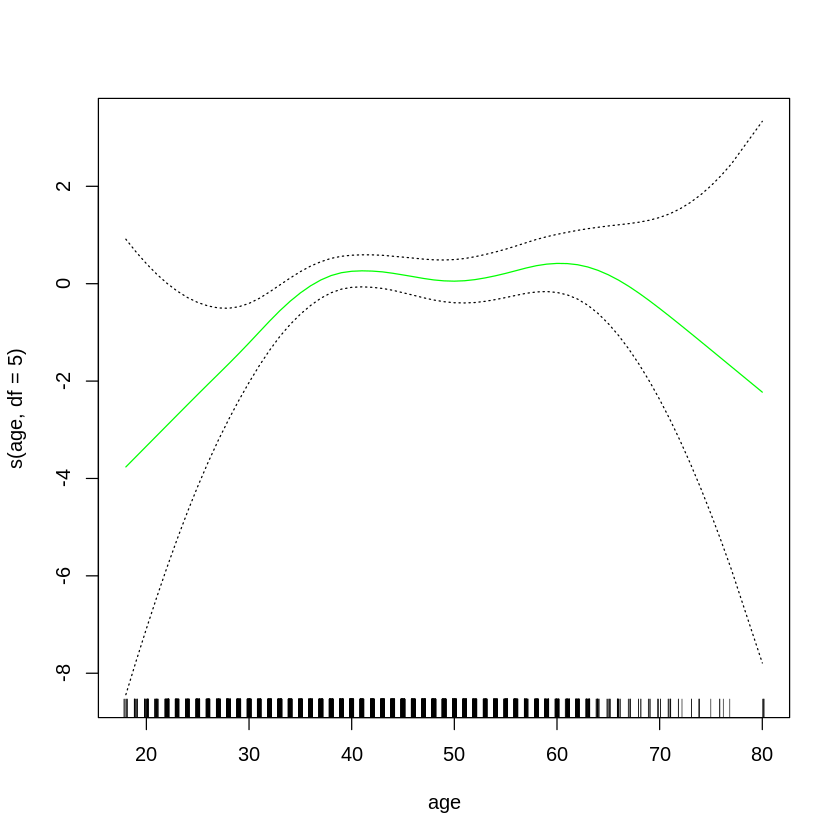

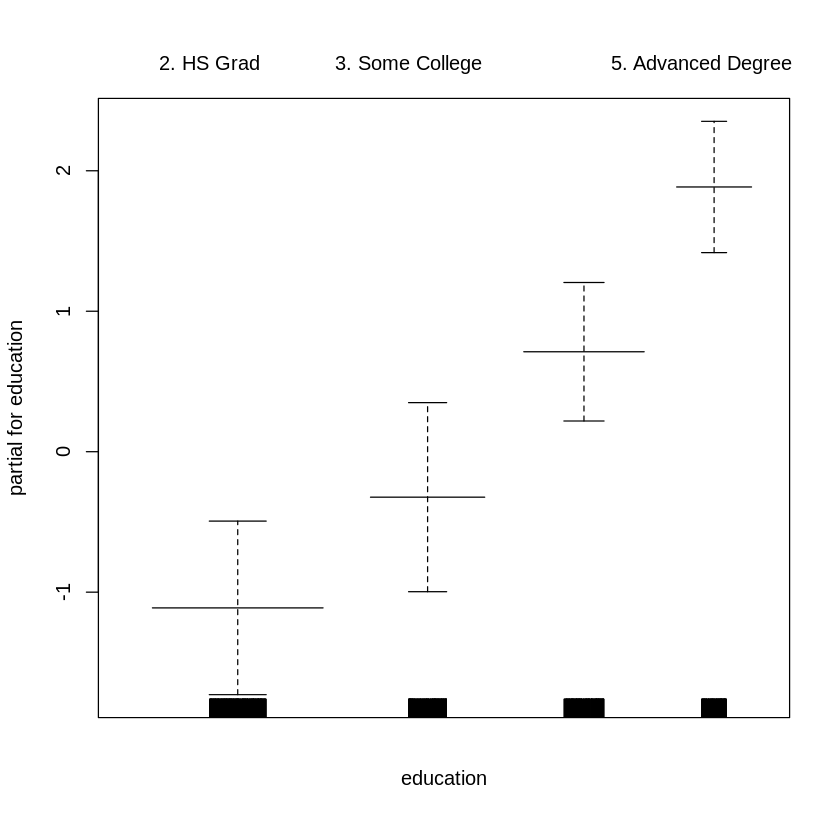

In [ ]:
gam.lr.s <- gam(
    I(wage > 250) ~ year + s(age, df = 5) + education,
    family = binomial, data = Wage,
    subset = (education != "1. < HS Grad")
  )
plot(gam.lr.s, se = T, col = "green")